In [4]:
%%system
rm -f neko.txt
wget -q http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt
mecab -o neko.txt.mecab < neko.txt

[]

## 30. 形態素解析結果の読み込み

In [43]:
from collections import OrderedDict


sentences = []
with open('neko.txt.mecab')as fd:
    sentence = OrderedDict()
    for line in fd:
        line = line.rstrip()
        if line == 'EOS':
            sentences.append(sentence)
            sentence = OrderedDict()
            continue
        (surface, pos) = line.split('\t')
        pos_columns = pos.split(',')
        key = ','.join([surface, pos_columns[6], pos_columns[0], pos_columns[1]])
        sentence[key] = surface

## 31. 動詞

In [44]:
verb_surfaces = set()
for sentence in sentences:
    for (key, surface) in sentence.items():
        pos_columns = key.split(',')
        if pos_columns[2] != '動詞':
            continue
        verb_surfaces.add(pos_columns[0])

## 32. 動詞の原形

In [45]:
verb_bases = set()
for sentence in sentences:
    for (key, surface) in sentence.items():
        pos_columns = key.split(',')
        if pos_columns[2] != '動詞':
            continue
        verb_bases.add(pos_columns[1])

## 33. サ変名詞

In [48]:
verb_bases = set()
for sentence in sentences:
    for (key, surface) in sentence.items():
        pos_columns = key.split(',')
        if pos_columns[3] != 'サ変接続':
            continue
        verb_bases.add(surface)

## 34. 「AのB」

In [50]:
a_and_bs = []
for sentence in sentences:
    a_and_b = []
    a_and_b_flag = False
    for (key, surface) in sentence.items():
        pos_columns = key.split(',')
        if pos_columns[2] == '名詞':
            a_and_b.append(surface)
            if len(a_and_b) >= 3 and 'の' in a_and_b:
                a_and_b_flag = True
        elif surface == 'の' and pos_columns[2] == '助詞' and a_and_b:
            a_and_b.append(surface)
        elif a_and_b_flag:
            a_and_bs.append(''.join(a_and_b))
            a_and_b = []
            a_and_b_flag = False
        else:
            a_and_b = []

## 35. 名詞の連接

In [52]:
all_longest_nouns = []
for sentence in sentences:
    longest_nouns = []
    for (key, surface) in sentence.items():
        pos_columns = key.split(',')
        if pos_columns[2] == '名詞':
            longest_nouns.append(surface)
        elif len(longest_nouns) > 1:
            all_longest_nouns.append(''.join(longest_nouns))
            longest_nouns = []

## 36. 単語の出現頻度

In [54]:
from collections import Counter

word_counter = Counter()
for sentence in sentences:
    for (key, surface) in sentence.items():
        word_counter[key] += 1

## 37. 頻度上位10語

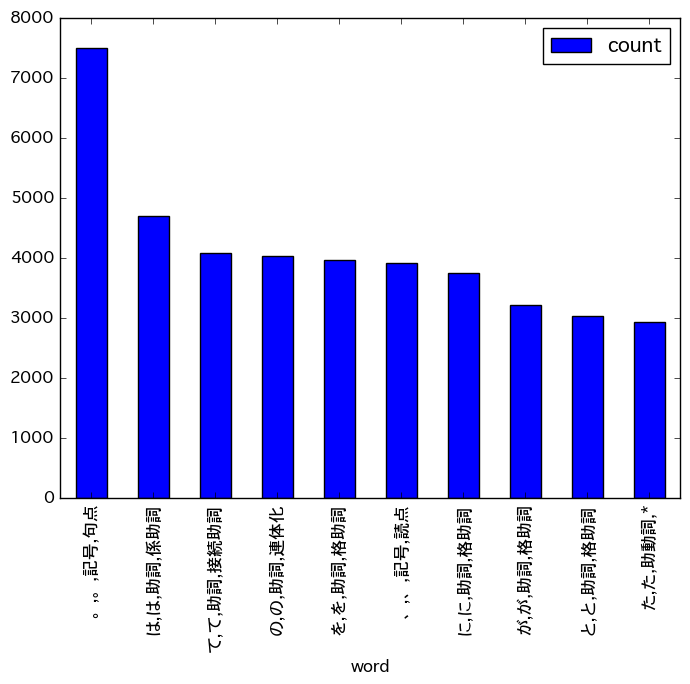

In [78]:
%matplotlib inline

import pandas as pd

df = pd.DataFrame.from_dict(word_counter, orient='index').reset_index()
df = df.rename(columns={'index':'word', 0:'count'})
df.sort_values(ascending=False, by=['count'])[:10].plot(kind='bar', x='word')

## 38. ヒストグラム

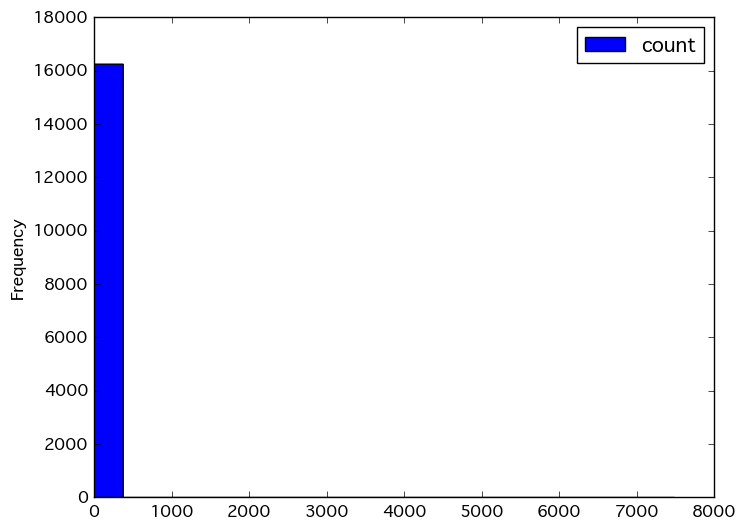

In [98]:
df.plot(kind='hist', bins=20)

## 39. Zipfの法則

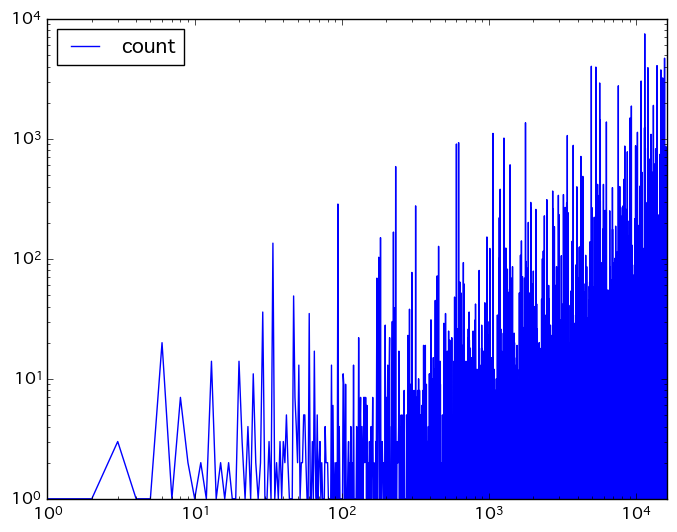

In [100]:
df.plot(logx=True, logy=True, use_index=False)